In [1]:
import numpy as N
import numpy.random as NR
import pandas
import tqdm
import matplotlib.pyplot as pyplot
import seaborn

seaborn.set_style('whitegrid')

import tqdm
import torch as T
import torch.distributions as TD
import torch.distributions.constraints as TDC
import torch.nn as TN
import torch.nn.functional as TNF
import pyro as P
import pyro.infer as PI
import pyro.optim as PO
import pyro.distributions as PD
import pyro.nn as PN

P.set_rng_seed(0)

In [2]:
import sys
sys.path.append('..')
sys.path.append('../..')
import igg
import model
import guide
#from guide import _nn_model_q, _nn_model_y

In [3]:
 def draw():
    mu = NR.uniform(0, 5)
    obs = NR.normal(mu, 1.0, (1,))
    return float(obs.astype('float32'))

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:51<00:00, 58.21it/s]


<AxesSubplot:xlabel='step', ylabel='loss'>

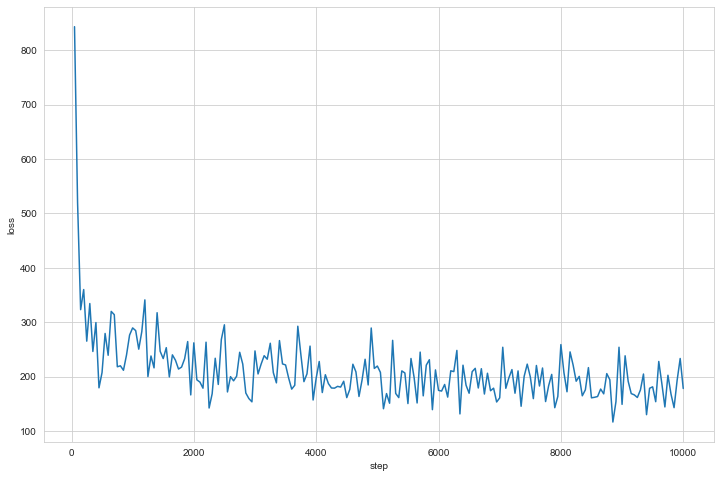

In [4]:
P.clear_param_store()
svi = PI.SVI(model=model.model,
            guide=guide.model,
            optim=PO.Adam({"lr": 0.001}),
             loss=PI.Trace_ELBO()
            )
hist = pandas.DataFrame(columns=["step", "loss"])
avg_l = 0
for step in tqdm.trange(10000):
    obs = draw()
    loss = svi.step(obs)
    avg_l += loss
    if (step + 1) % 50 == 0:
        hist = hist.append({
            "step": step,
            "loss": avg_l / 50,
        }, ignore_index=True)
        avg_l = 0

fig, ax = pyplot.subplots(figsize=(12,8))
seaborn.lineplot(x="step", y="loss", data=hist, ax=ax)

### 